In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinson-disease-detection/Parkinsson disease.csv


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = pd.read_csv("../input/parkinson-disease-detection/Parkinsson disease.csv")

In [55]:
X.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [56]:
X.dropna(axis = 0, subset = ['status'], inplace = True)
y = X.status
X.drop(['status'], axis = 1, inplace = True)

In [57]:
X.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [58]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [column for column in X.columns if X[column].nunique() < 10 and 
                        X[column].dtype == "object"]

# Select numeric columns
numeric_cols = [column for column in X.columns if X[column].dtype in ['int64', 'float64']]

# Keep selected columns only
cols = low_cardinality_cols + numeric_cols
X = X[cols]

# One-hot encode the data (to shorten the code, we use pandas)
X = pd.get_dummies(X)

X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [59]:
from mlxtend.preprocessing import minmax_scaling

minmax_scaling(X, columns = X.columns, min_val = -1, max_val = 1)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.499820,0.262986,0.165722,0.092440,0.090909,0.093931,0.089496,0.094076,0.286014,0.262942,...,0.155142,0.362306,0.085909,0.450134,0.447684,0.333127,0.257894,0.260408,0.549049,0.183318
191,0.705488,0.307974,0.138243,0.125794,0.090909,0.126686,0.107181,0.126826,0.164050,0.146261,...,0.088828,0.221338,0.055543,0.435097,0.408567,0.434101,0.319956,0.276956,0.605474,0.257558
192,0.502730,0.281413,0.050727,0.378653,0.288538,0.267823,0.252947,0.267940,0.123608,0.140509,...,0.072594,0.156631,0.338988,0.383728,0.352318,0.324299,0.212945,0.342577,0.558967,0.180580
193,0.642893,0.601807,0.054279,0.181703,0.130435,0.145472,0.159700,0.145288,0.122512,0.128184,...,0.066544,0.155989,0.227838,0.429936,0.454176,0.277579,0.220650,0.452885,0.318222,0.163137


In [60]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [61]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 0, disable_default_eval_metric = True, use_label_encoder = False)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              disable_default_eval_metric=True, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [62]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_valid)

In [63]:
print(sum(y_valid - predictions))
print(len(predictions), len(y_valid))

from sklearn.metrics import accuracy_score

xgboost_acc = accuracy_score(y_valid, predictions) * 100
xgboost_error = mean_absolute_error(predictions, y_valid)
print(xgboost_acc)
print(xgboost_error)

plots = {'model': [], 'accuracy': [], 'error': []}
plots['model'].append('Xgboost')
plots['accuracy'].append(xgboost_acc)
plots['error'].append(xgboost_error)

2
39 39
94.87179487179486
0.05128205128205128


In [64]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators = 200, random_state = 1)

forest_model.fit(X_train, y_train)

forest_predictions = forest_model.predict(X_valid)

forest_acc = accuracy_score(y_valid, forest_predictions) * 100
forest_error = mean_absolute_error(forest_predictions, y_valid)
print(forest_error)
print(forest_acc)

plots['model'].append('Random Forest')
plots['accuracy'].append(forest_acc)
plots['error'].append(forest_error)

0.07692307692307693
92.3076923076923


In [65]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train, y_train)

bayes_predictions = NaiveBayes.predict(X_valid)

bayes_acc = accuracy_score(y_valid, bayes_predictions) * 100
bayes_error = mean_absolute_error(bayes_predictions, y_valid)
print(bayes_error)
print(bayes_acc)

plots['model'].append('Naive Bayes')
plots['accuracy'].append(bayes_acc)
plots['error'].append(bayes_error)

0.3333333333333333
66.66666666666666


In [66]:
from sklearn.svm import SVC

SVM = SVC(gamma = 'auto')

SVM.fit(X_train, y_train)

svm_predictions = SVM.predict(X_valid)

svm_acc = accuracy_score(y_valid, svm_predictions) * 100
svm_error = mean_absolute_error(svm_predictions, y_valid)
print(svm_error)
print(svm_acc)

plots['model'].append('SVM')
plots['accuracy'].append(svm_acc)
plots['error'].append(svm_error)

0.23076923076923078
76.92307692307693


In [67]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1, solver = 'lbfgs', max_iter = 1000)

lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_valid)

lr_acc = accuracy_score(y_valid, lr_predictions) * 100
lr_error = mean_absolute_error(lr_predictions, y_valid)
print(lr_error)
print(lr_acc)

plots['model'].append('Logistic Regression')
plots['accuracy'].append(lr_acc)
plots['error'].append(lr_error)

0.10256410256410256
89.74358974358975


In [68]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)

dt.fit(X_train, y_train)

dt_predictions = dt.predict(X_valid)

dt_acc = accuracy_score(y_valid, dt_predictions) * 100
dt_error = mean_absolute_error(dt_predictions, y_valid) 
print(dt_error)
print(dt_acc)

plots['model'].append('Decision Tree')
plots['accuracy'].append(dt_acc)
plots['error'].append(dt_error)

0.1282051282051282
87.17948717948718


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

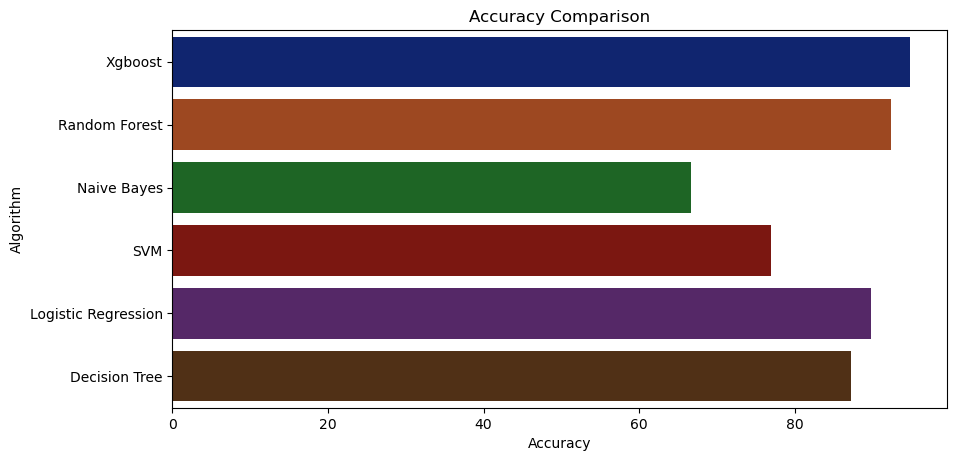

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [10, 5], dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = plots['accuracy'], y = plots['model'], palette = 'dark')

<AxesSubplot:title={'center':'Error Comparison'}, xlabel='Error', ylabel='Algorithm'>

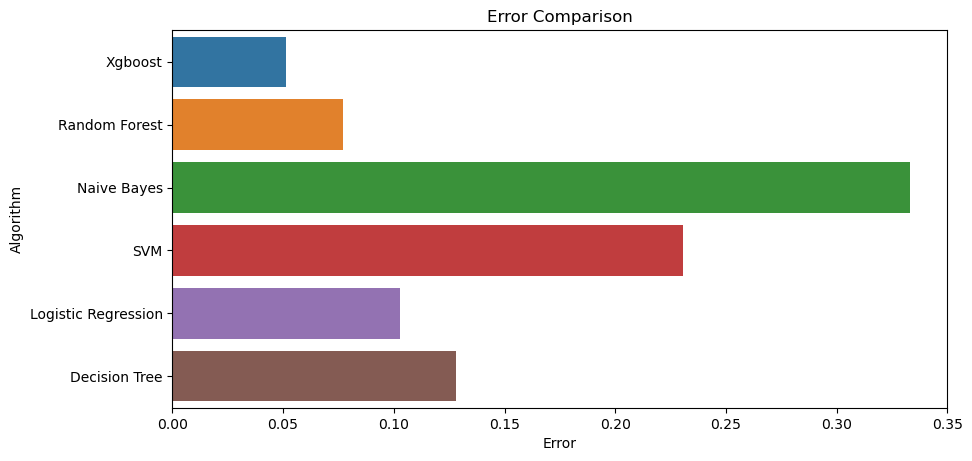

In [70]:
plt.figure(figsize = [10, 5], dpi = 100)
plt.title('Error Comparison')
plt.xlabel('Error')
plt.ylabel('Algorithm')
sns.barplot(x = plots['error'], y = plots['model'])

In [71]:
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras import callbacks

# nn_model = keras.Sequential([
#     layers.Dense(units = 128, activation = 'relu', input_shape = [22]),
#     layers.Dense(units = 128, activation = 'relu'),
#     layers.Dense(units = 128, activation = 'relu'),
#     layers.Dense(units = 1)
# ])

# nn_model.compile(
#     optimizer = "adam",
#     loss = "mae"
# )

# early_stopping = callbacks.EarlyStopping(
#     min_delta = 0.001,
#     patience = 5,
#     restore_best_weights = True
# )

# nn_model.fit(
#     X_train, y_train,
#     batch_size = 30,
#     epochs = 50,
#     callbacks = [early_stopping]
# )

# nn_predictions = nn_model.predict(X_valid)

# print(mean_absolute_error(nn_predictions, y_valid))
# #print(accuracy_score(y_valid, nn_predictions) * 100)